# Auto Encoder Example.

Keras 를 이용한 Auto Encoder 구현하기<BR>
feat. MNIST 이미지<BR><BR>
Auto Encoder 를 만들기 위해서는 세 가지가 필요하다.
- 인코딩 함수
- 디코딩 함수
- 원본과 압축된 표현, 압축 해제된 표현 간 정보 손실량 간의 거리 함수

## MNIST 데이터 가져오기

In [1]:
import numpy as np
from keras.datasets import mnist

(x_train, _), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


## Data 전처리

In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


## Auto Encoder 모델 만들기

In [3]:
## make a model
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# intput size
input_dim = 784

# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input01
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


## 모델 학습

In [4]:

## train
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

## test
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print(encoded_imgs.shape)
print('z: ' + str(encoded_imgs))


Epoch 1/50
235/235 [==============================] - 12s 5ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.693

## 확인하기

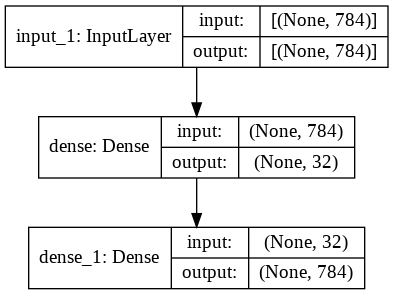

In [5]:

## structure of model
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, show_shapes=True, to_file='autoencoder.png')


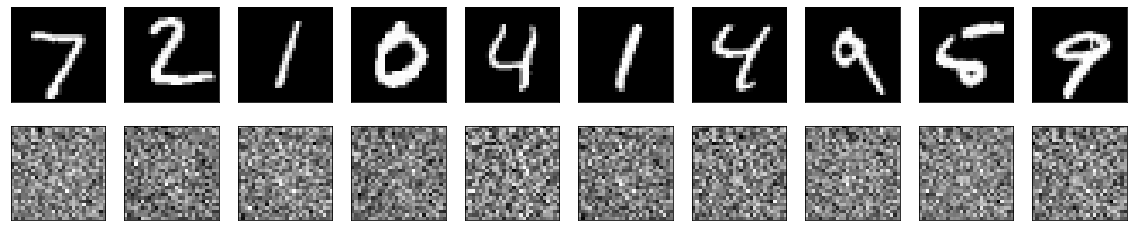

In [6]:

## visualize
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()